----------

# Simulated Annealing

By Dibakar Sigdel  :   Date April-26-2016

### Introduction to Simulated Annealing

Simulated annealing [1] copies a phenomenon in nature--the annealing of solids--to optimize a complex system. Annealing refers to heating a solid and then cooling it slowly. Atoms then assume a nearly globally minimum energy state. In 1953 Metropolis created an algorithm to simulate the annealing process. The algorithm simulates a small random displacement of an atom that results in a change in energy. If the change in energy is negative, the energy state of the new configuration is lower and the new configuration is accepted. If the change in energy is positive, the new configuration has a higher energy state; however, it may still be accepted according to the Boltzmann probability factor:

$P  = exp(\frac{-\triangle E}{K_{b}T})$

where $K_b$ is the Boltzmann constant and T is the current temperature. By examining this equation we should note two things: the probability is proportional to temperature--as the solid cools, the probability gets smaller; and inversely proportional to --as the change in energy is larger the probability of accepting the change gets smaller. 

* Pictorial Algorithm

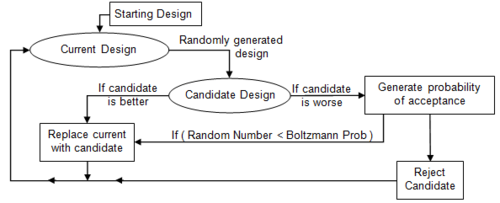

In [62]:
from IPython.display import Image
Image(filename='sim.png')

When applied to engineering design, an analogy is made between energy and the objective function. The design is started at a high “temperature”, where it has a high objective (we assume we are minimizing). Random perturbations are then made to the design. If the objective is lower, the new design is made the current design; if it is higher, it may still be accepted according the probability given by the Boltzmann factor. The Boltzmann probability is compared to a random number drawn from a uniform distribution between 0 and 1; if the random number is smaller than the Boltzmann probability, the configuration is accepted. This allows the algorithm to escape local minima. 

* Required Libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

---------------

## Part -I : Problem set up

#### Define Objective function

Consider a  2D system where atoms are interacting with the surface of a material. A model for the interaction potential is

$V(x) = V_{o}\left \lbrace nA + \sum_{i=1}^{n}[x_{i}^{2} - A \cos(2\pi x_{i})]\right \rbrace $

where $n = 2$: two dimensions.

A = 10; $V_{o}$ is in energy unit.

Consider the section $x_{1,2} \in [-4,4]$ of the surface.


------------

* Surface Potential function

In [33]:
def potential(x1,x2):
    obj = (2*10.0) + x1**2 + x2**2 - (10.0)*(math.cos(2.0*3.1415*x1) - math.cos(2.0*3.1415*x2))
    return obj

* Design variables for mesh points

In [52]:
ix = np.arange(-4.0, 4.0, 0.05)
iy = np.arange(-4.0, 4.0, 0.05)
X,Y = np.meshgrid(ix, iy)
fz = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        fz[i][j] = potential(X[i][j],Y[i][j])   

#### 3D plot of surface potential

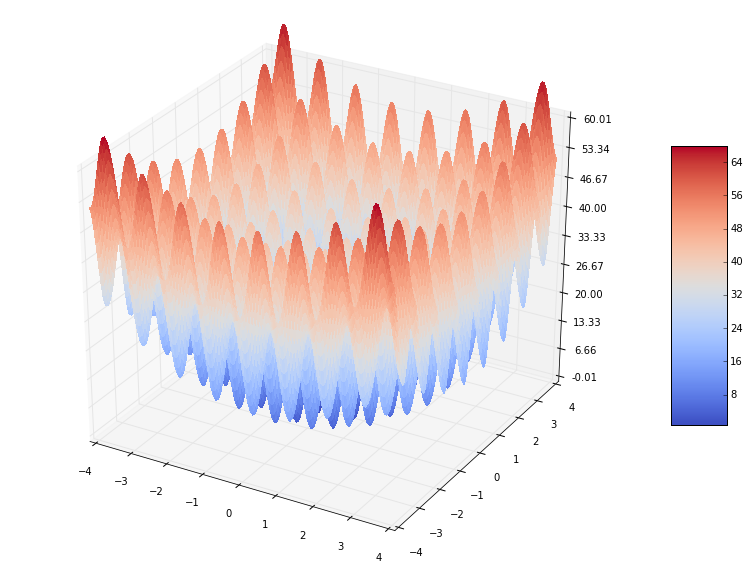

In [54]:
fig = plt.figure(figsize=(14, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, fz, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 60.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Density Plot of surface potential

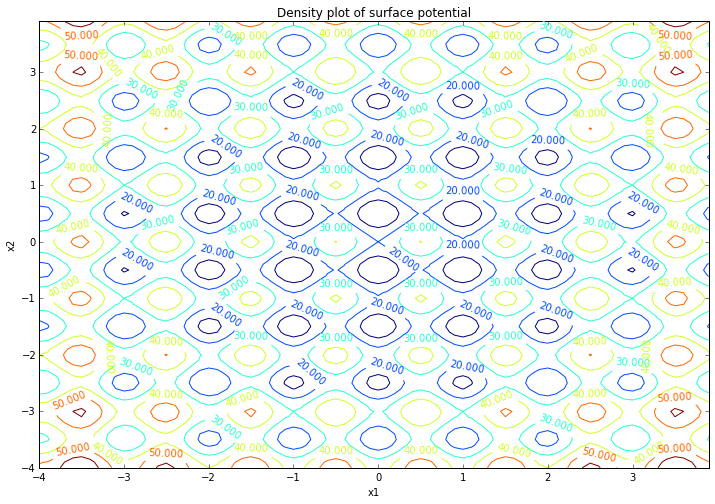

In [63]:
plt.figure(figsize=(12, 8))
# Specify contour lines
CS = plt.contour(x1m, x2m, fm)#,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('Density plot of surface potential')
plt.xlabel('x1')
plt.ylabel('x2')

---------------------------

## Part - II : Simulation

#### Task 

Put $N = 1000$ atoms on the surface. Compute a configuration $X_{o} = {x_{1},...,x_{N}}$ of minial potential energy $E[X_{o}]$ using simulated annealing. Apply Bose statistics, any number of atoms may occupy a local minimum $\vec{x}_{min}$.

-------------

* Simulation setting

In [64]:
# Start location
x_start = [0.5, -0.5]

In [80]:
#Number of particles
N =1000
# Number of cycles
n = 1000
# Number of trials per cycle
m = 500
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0/math.log(p1)
# Final temperature
t50 = -1.0/math.log(p50)
# Fractional reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))
# Initialize x
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# Current best results so far
xc = np.zeros(2)
xc = x[0]
fc = potential(xi[0],xi[1])
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0


* Simulation

Best solution: [ 0.91536557 -0.66902677]
Best objective: 7.79514624035


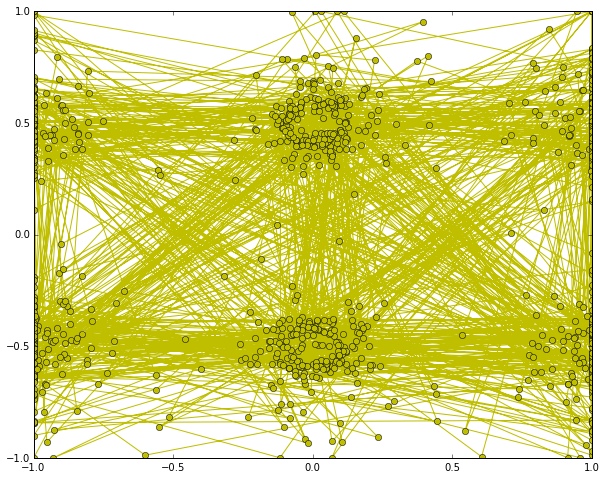

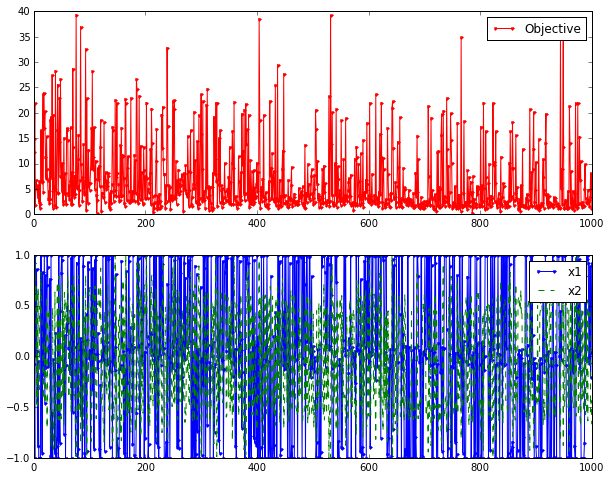

In [82]:
for i in range(n):
    #print 'Cycle: ' + str(i) + ' with Temperature: ' + str(t)
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc)
        if (potential(xi[0],xi[1])>fc):
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = potential(xc[0],xc[1])
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # Lower the temperature for next cycle
    t = frac * t

# print solution
print 'Best solution: ' + str(xc)
print 'Best objective: ' + str(fc)
plt.figure(figsize=(10, 8))
plt.plot(x[:,0],x[:,1],'y-o')
#plt.savefig('contour.png')

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-')
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])

# Save the figure as a PNG
#plt.savefig('iterations.png')

plt.show()

* Repeat this for 1000 particles

-----------------------

### References

1 . Simulated Annealing Tutorial http://apmonitor.com/me575/index.php/Main/SimulatedAnnealing

 2 . The Simulated Annealing Algorithm http://katrinaeg.com/simulated-annealing.html

3 . Simulated Annealing for beginners  http://www.theprojectspot.com/tutorial-post/simulated-annealing-algorithm-for-beginners/6

4 . Simulated Annealing: http://csg.sph.umich.edu/abecasis/class/2006/615.19.pdf

5 . Simulated Annealing : http://mathworld.wolfram.com/SimulatedAnnealing.html